### Análisis EDA del conjunto de prueba del modelo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, f_oneway


In [2]:
df_example= pd.read_csv('AI_Human.csv',index_col=0)

In [3]:
# Supongamos que tienes una pivot table llamada pivot_table
df_example = df_example.reset_index()

In [4]:
df_example['len_text'] = df_example['text'].str.len()

In [5]:
df_example['generated']= df_example['generated'].convert_dtypes(int)

In [6]:
df_example.rename(columns={'generated': 'class'}, inplace=True)

In [7]:
df_example

,text,class,len_text
0,Cars. Cars have been around since they became ...,0,3289
1,Transportation is a large necessity in most co...,0,2738
2,"""America's love affair with it's vehicles seem...",0,4428
3,How often do you ride in a car? Do you drive a...,0,4013
4,Cars are a wonderful thing. They are perhaps o...,0,4698
...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0,968
487231,The whole purpose of democracy is to create a ...,0,2319
487232,I firmly believe that governments worldwide sh...,1,2392
487233,I DFN't agree with this decision because a LFT...,0,1668


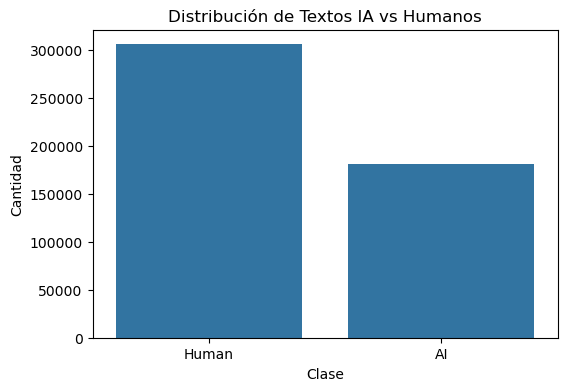

In [8]:
# 1. Distribución de clases
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df_example)
plt.title('Distribución de Textos IA vs Humanos')
plt.xticks([0, 1], ['Human', 'AI'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

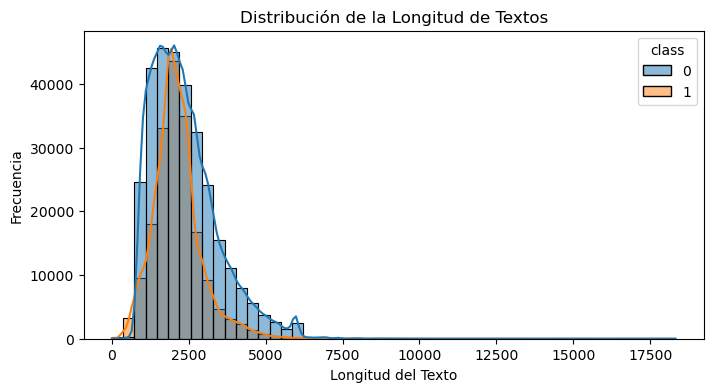

In [9]:
# 2. Longitud de los textos
plt.figure(figsize=(8, 4))
sns.histplot(data=df_example, x='len_text', hue='class', bins=50, kde=True)
plt.title('Distribución de la Longitud de Textos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
# 3. Verificar valores faltantes
missing_data = df_example.isnull().sum()
print("Valores faltantes por columna:\n", missing_data)

Valores faltantes por columna:
 text        0
class       0
len_text    0
dtype: int64


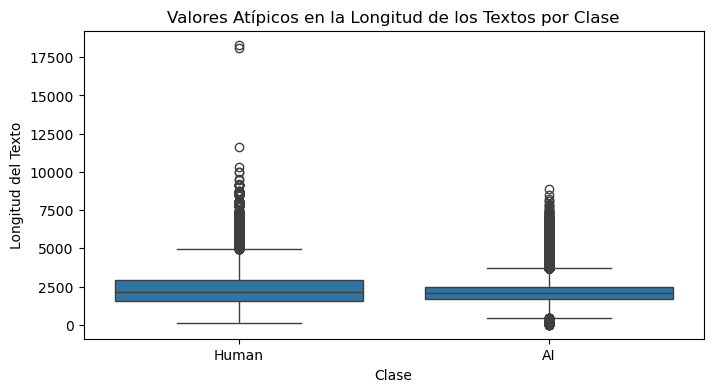

In [11]:
# 4. Identificación de valores atípicos (outliers)
# Se puede hacer con un boxplot de la longitud del texto
plt.figure(figsize=(8, 4))
sns.boxplot(x='class', y='len_text', data=df_example)
plt.title('Valores Atípicos en la Longitud de los Textos por Clase')
plt.xticks([0, 1], ['Human', 'AI'])
plt.xlabel('Clase')
plt.ylabel('Longitud del Texto')
plt.show()

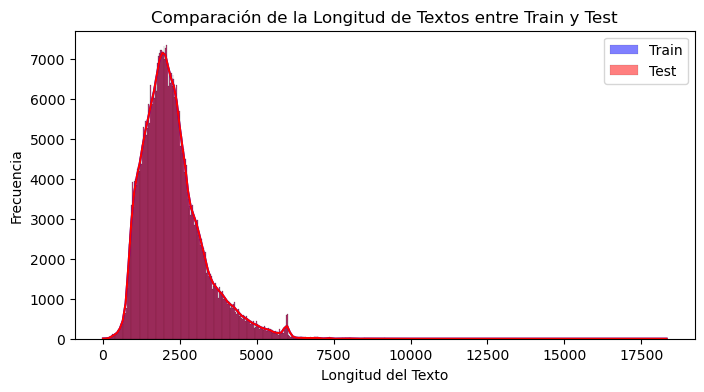

In [12]:
# 5. Comparación con el conjunto de entrenamiento (si está disponible)
# Supongamos que tienes df_train como tu conjunto de entrenamiento

# Comparar la longitud del texto entre el conjunto de entrenamiento y el conjunto de prueba
df_example['len_text'] = df_example['text'].apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(df_example['len_text'], color='blue', label='Train', kde=True)
sns.histplot(df_example['len_text'], color='red', label='Test', kde=True)
plt.title('Comparación de la Longitud de Textos entre Train y Test')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

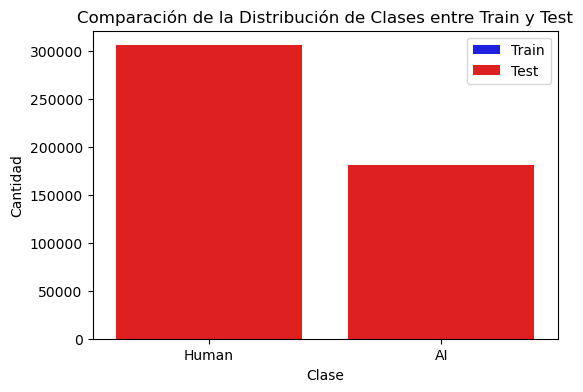

In [13]:

# Comparar la distribución de clases
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df_example, color='blue', label='Train')
sns.countplot(x='class', data=df_example, color='red', label='Test')
plt.title('Comparación de la Distribución de Clases entre Train y Test')
plt.xticks([0, 1], ['Human', 'AI'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend()
plt.show()


In [14]:

# Supongamos que tienes una columna numérica en tu DataFrame
Q1 = df_example['len_text'].quantile(0.25)
Q3 = df_example['len_text'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_example_no_outliers = df_example[(df_example['len_text'] >= lower_bound) & (df_example['len_text'] <= upper_bound)]

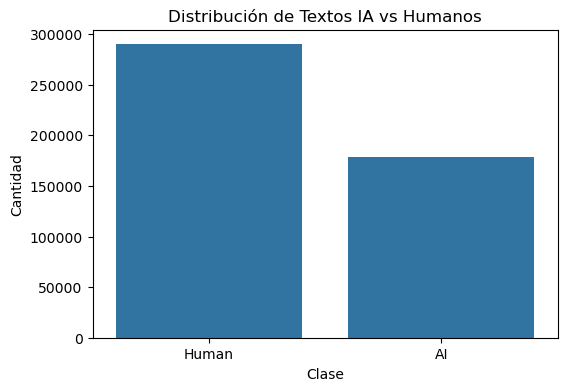

In [15]:
# 1. Distribución de clases
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df_example_no_outliers)
plt.title('Distribución de Textos IA vs Humanos')
plt.xticks([0, 1], ['Human', 'AI'])
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

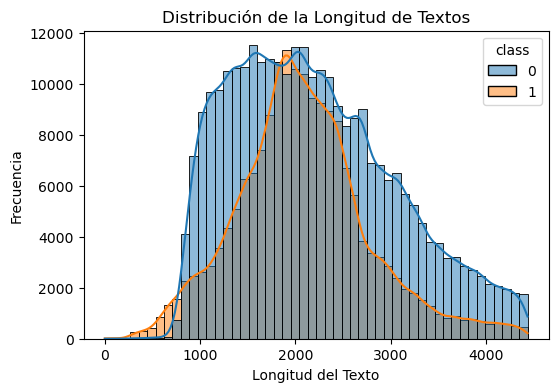

In [16]:
# 2. Longitud de los textos
plt.figure(figsize=(6, 4))
sns.histplot(data=df_example_no_outliers, x='len_text', hue='class', bins=50, kde=True)
plt.title('Distribución de la Longitud de Textos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

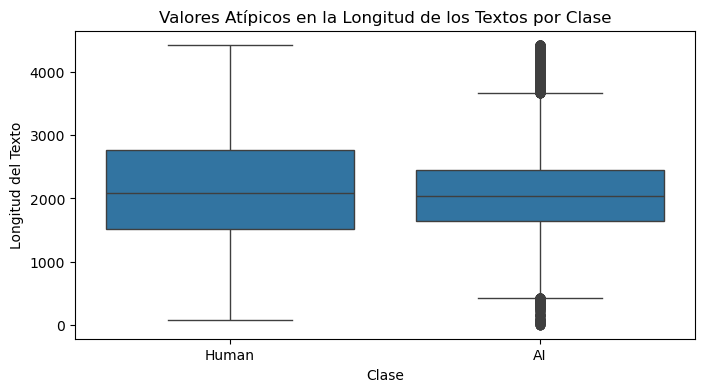

In [17]:
# 4. Identificación de valores atípicos (outliers)
# Se puede hacer con un boxplot de la longitud del texto
plt.figure(figsize=(8, 4))
sns.boxplot(x='class', y='len_text', data=df_example_no_outliers)
plt.title('Valores Atípicos en la Longitud de los Textos por Clase')
plt.xticks([0, 1], ['Human', 'AI'])
plt.xlabel('Clase')
plt.ylabel('Longitud del Texto')
plt.show()

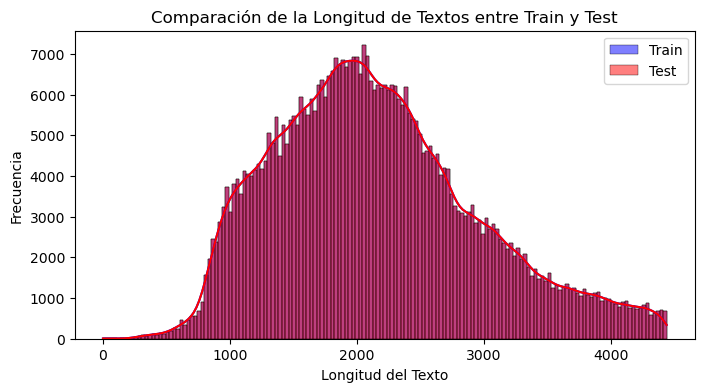

In [18]:
# 5. Comparación con el conjunto de entrenamiento (si está disponible)
# Supongamos que tienes df_train como tu conjunto de entrenamiento

plt.figure(figsize=(8, 4))
sns.histplot(df_example_no_outliers['len_text'], color='blue', label='Train', kde=True)
sns.histplot(df_example_no_outliers['len_text'], color='red', label='Test', kde=True)
plt.title('Comparación de la Longitud de Textos entre Train y Test')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [19]:
df_example_no_outliers['class'].value_counts(normalize=True)

class
0    0.618569
1    0.381431
Name: proportion, dtype: Float64

### Undersampling
Para mejorar la distribucion de clases en el conjunto de datos de prueba

In [20]:
# Separar el dataframe por clases
df_class_0 = df_example_no_outliers[df_example_no_outliers['class'] == 0]
df_class_1 = df_example_no_outliers[df_example_no_outliers['class'] == 1]

In [21]:
# Submuestreo de la clase mayoritaria (0) para igualarla con la clase minoritaria (1)
df_class_0_under = df_class_0.sample(n=len(df_class_1), random_state=42)

In [22]:
# Unir las dos clases balanceadas
df_balanced = pd.concat([df_class_0_under, df_class_1])

# Verificar el balance de clases
print("Distribución de clases después del submuestreo:")
print(df_balanced['class'].value_counts(normalize=True))


Distribución de clases después del submuestreo:
class
0    0.5
1    0.5
Name: proportion, dtype: Float64


In [23]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357426 entries, 303853 to 487232
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      357426 non-null  object
 1   class     357426 non-null  Int64 
 2   len_text  357426 non-null  int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 11.2+ MB


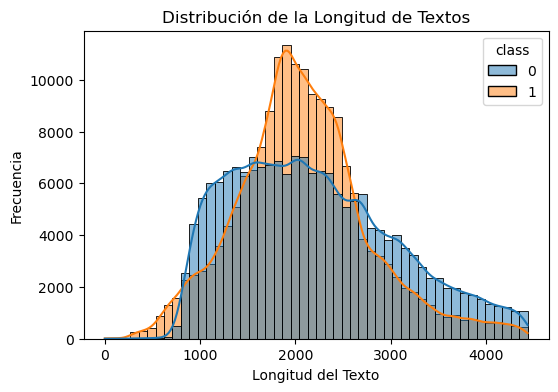

In [24]:
# 2. Longitud de los textos
plt.figure(figsize=(6, 4))
sns.histplot(data=df_balanced, x='len_text', hue='class', bins=50, kde=True)
plt.title('Distribución de la Longitud de Textos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

### Reduccion del dataframe

In [25]:
# Reducir el tamaño del dataframe balanceado a 50,000 filas
df_reduced = df_balanced.sample(n=50000, random_state=42)

# Verificar el tamaño y la distribución de clases en el dataframe reducido
print("Tamaño del dataframe reducido:", df_reduced.shape)
print("Distribución de clases en el dataframe reducido:")
print(df_reduced['class'].value_counts(normalize=True))


Tamaño del dataframe reducido: (50000, 3)
Distribución de clases en el dataframe reducido:
class
0    0.50224
1    0.49776
Name: proportion, dtype: Float64


### Limpieza

In [26]:
import gensim # take text for clean and tokenize list of words
from gensim.parsing.preprocessing import STOPWORDS
import nltk
nltk.download('stopwords') #language package for english
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stop_words = list(stopwords.words("english"))

In [28]:
import gensim
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Inicializamos PorterStemmer
ps = PorterStemmer()

# Cargamos las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para limpiar y procesar el texto
def limpiar_texto(text):
    # Verificar si el texto no es nulo o vacío
    if isinstance(text, str):
        # Eliminar saltos de línea y múltiples espacios
        text = re.sub(r'\s+', ' ', text)  # Reemplaza saltos de línea y tabs por un espacio
        text = text.strip()  # Elimina espacios en blanco iniciales y finales

        # Convertir a palabras en minúsculas y filtrar stopwords
        words = [
            ps.stem(word) for word in gensim.utils.simple_preprocess(text)
            if word not in gensim.parsing.preprocessing.STOPWORDS and word not in stop_words
        ]
        return ' '.join(words)
    else:
        return None  # Devuelve None si el texto es inválido

# Aplicar la función de limpieza al DataFrame
df_reduced['text_cleaned'] = df_reduced['text'].apply(limpiar_texto)

# Eliminar filas donde el texto limpio es None o vacío
df_reduced = df_reduced[df_reduced['text_cleaned'].notnull() & (df_reduced['text_cleaned'] != '')]

# Reiniciar el índice del DataFrame después de eliminar las filas
df_reduced.reset_index(drop=True, inplace=True)



### Guardado del dataframe

In [29]:
df_reduced.to_csv('example_reduced.csv', index=False)